# DNN manual implementation

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [2]:
n = 500
p = 2

X, y = make_circles(n_samples=n, factor=0.5, noise=0.05)
y = y[:, np.newaxis]

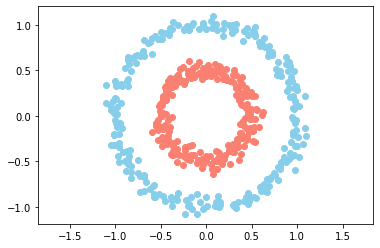

In [3]:
plt.scatter(X[y[:, 0]==0, 0], X[y[:, 0]==0, 1], c='skyblue')
plt.scatter(X[y[:, 0]==1, 0], X[y[:, 0]==1, 1], c='salmon')
plt.axis('equal')
plt.show()

In [4]:
class neural_layer():
  def __init__(self, n_conn, n_neur, act):
    self.act = act
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1

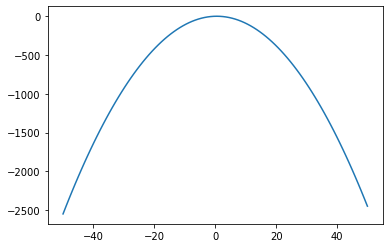

In [5]:
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

# relu = lambda x: np.maximum(0, x)

_x = np.linspace(-50, 50, 100)
plt.plot(_x, sigm[1](_x))

In [6]:
def create_nn(topology, act):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(layer, topology[l+1], act))
  return nn

topology = [p, 4, 8, 1]
# create_nn(topology, sigm)

In [7]:
topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigm)
l2_cost = (lambda y_pred, y_real: np.mean((y_pred - y_real) ** 2),
           lambda y_pred, y_real: (y_pred - y_real))

def train(neural_net, X, y, l2_cost, lr = 0.05, train=True):
  
  output = [(None, X)]

  #Forward pass
  for l, layer in enumerate(neural_net):
    z = output[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act[0](z)
    output.append((z, a))
  # print(l2_cost[0](output[-1][1], y)) # Error de la función de coste

  if train:
    # Backward pass
    deltas = []
    for l in reversed(range(0, len(neural_net))):

      # z = output[l+1][0]
      a = output[l+1][1]
      # print(a.shape) # Forma del vector de predicción

      if (l == len(neural_net) - 1):
        # Delta última capa
        deltas.insert(0, l2_cost[1](a, y) * neural_net[l].act[1](a))

      else:
        # Delta respecto capa previa
        deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act[1](a))

      _w = neural_net[l].w

      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      # print(neural_net[l].b)
      neural_net[l].w = neural_net[l].w - output[l][1].T @ deltas[0] * lr

  return output[-1][1]

train(neural_net, X, y, l2_cost, 0.5)
print("")

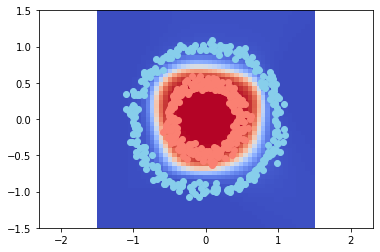

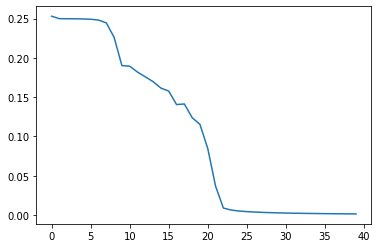

In [8]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(1000):
  # Entrenamos la red!
  pY = train(neural_n, X, y, l2_cost, lr=0.05)
  if i % 25 ==0:
    print(pY)

    loss.append(l2_cost[0](pY, y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _y[i0, i1] = train(neural_n, np.array([[x0, x1]]), y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[y[:, 0]==0, 0], X[y[:, 0]==0, 1], c='skyblue')
    plt.scatter(X[y[:, 0]==1, 0], X[y[:, 0]==1, 1], c='salmon')

    # plt.scatter(X[y[:, 0]==0, 0], X[y[:, 0]==0, 1], c='skyblue')
    # plt.scatter(X[y[:, 0]==1, 0], X[y[:, 0]==1, 1], c='salmon')

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)